## Absorption along continuum emission

- ctr = centre coordinates where Absorption is seen in kvis

In [1]:
import numpy as np
import shutil
from astropy.io import ascii, fits
from ants import absInt, fluxInt

abSex = absInt.absint()
fl = fluxInt.fluxint()

get_ipython().magic(u'pylab inline')


#Inputs
cubeDir = '/Users/maccagni/Projects/MFS/FornaxA/centreHI/cubes/'
cubeName = cubeDir+'FA_centreCut.fits'

contDir = '/Users/maccagni/Projects/MFS/FornaxA/centreHI/continuum/'
contName = contDir+'M64_FA_UF-meq-resplit_2-MFS-image.fits'
#contName = '/Users/maccagni/Projects/MFS/FornaxA/contData/inIms/Meer_1440MHz_div_bt32.fits'

raCtr = '03:22:41.7'
decCtr= '-37:12:28.00'

raCtrPeak = '03:22:42.035'
decCtrPeak = '-37:12:28.00'

raNoise = '03:23:10.775'
decNoise= '-37:10:32.28'

sysVel = 1760.

#Outputs
outDir = '/Users/maccagni/Projects/MFS/FornaxA/centreHI/absorption/spectra/'
plotDir = '/Users/maccagni/Projects/MFS/FornaxA/centreHI/absorption/plots/'
specNameCtr = outDir+'M64-ctr-20asecCtr'
specNamePeak = outDir+'M64-ctr-20asecPeak'

outPlotPeak = plotDir+'M64-ctr-20asecPeak.pdf'
outPlotCtr = plotDir+'M64-ctr-20asecCtr.pdf'


print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''

Populating the interactive namespace from numpy and matplotlib
	+---------+
	 Inputs loaded
	+---------+


/Users/maccagni/programs/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/maccagni/programs/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


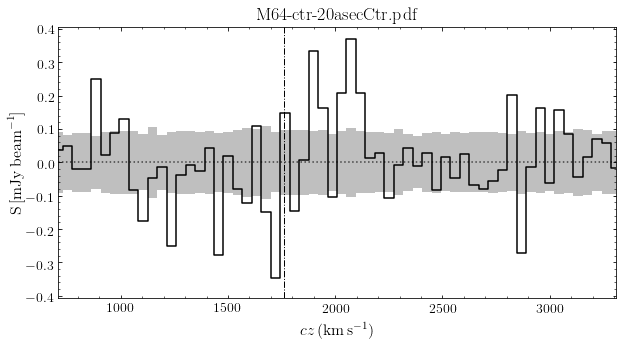

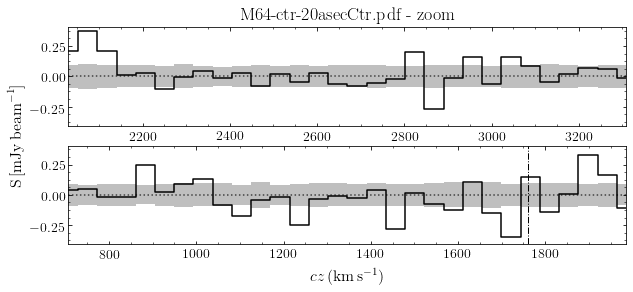

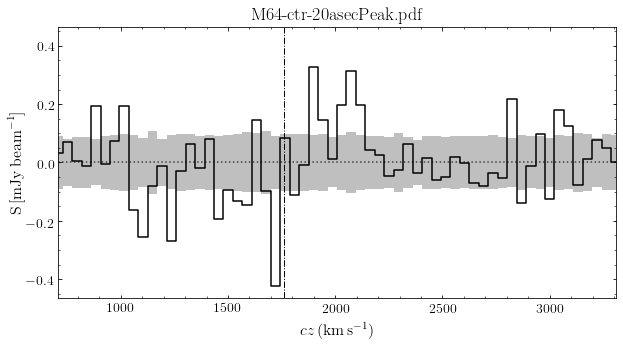

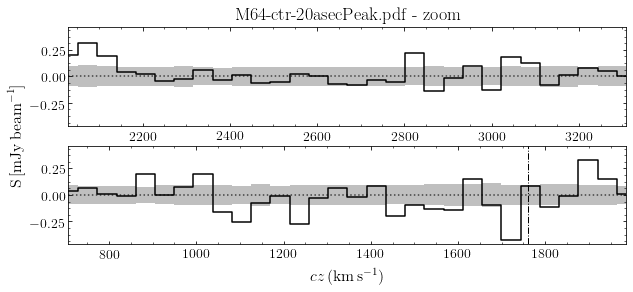

	+---------+
	 Spectrum plotted
	+---------+


In [2]:
#----------------------#
# HI contPeak
#----------------------#

fluxCont = fl.pointFlux(contName,raCtr,decCtr)
abSex.abSex(cubeName,specNameCtr,fluxCont,raCtr,decCtr,raNoise,decNoise)
abSex.absPlot(specNameCtr+'.txt',outPlotCtr,sysVel,30)


spec = ascii.read(specNameCtr+'.txt')
flux = np.array(spec[spec.colnames[1]], dtype=float)
optDepth = np.array(spec[spec.colnames[3]], dtype=float)


velArray = abSex.zaxis(cubeName)
velStep = (velArray[0]-velArray[-1])/len(velArray)/1e6
indexMin = np.nanargmin(flux)
indexMin64 = indexMin

oD = optDepth[indexMin]

print 'FluPk = '+str(np.round(flux[indexMin],6))
print 'tauPk = '+str(np.round(oD,6))

nhi = abSex.nhiAbs(oD,velStep)


base = fits.open(cubeName)
heads = base[0].header

bmaj = heads['BMAJ']
bmin = heads['BMIN']

print '''Beam =\t'''+str(bmaj*3600.)+''''' x '''+str(bmin*3600.)+''''' '''


print '''\t+---------+\n\t Spectrum plotted\n\t+---------+'''

In [ ]:
#----------------------#
# HI Peak
#----------------------#
fluxCont = fl.pointFlux(contName,raCtrPeak,decCtrPeak)
abSex.abSex(cubeName,specNamePeak,fluxCont,raCtrPeak,decCtrPeak,raNoise,decNoise)
abSex.absPlot(specNamePeak+'.txt',outPlotPeak,sysVel,30)

spec = ascii.read(specNamePeak+'.txt')
flux = np.array(spec[spec.colnames[1]], dtype=float)
optDepth = np.array(spec[spec.colnames[3]], dtype=float)


velArray = abSex.zaxis(cubeName)
velStep = (velArray[0]-velArray[-1])/len(velArray)/1e6
indexMin = np.nanargmin(flux)
indexMin64 = indexMin

oD = optDepth[indexMin]

print 'FluPk = '+str(np.round(flux[indexMin],6))
print 'tauPk = '+str(np.round(oD,6))

nhi = abSex.nhiAbs(oD,velStep)

print nhi/100

base = fits.open(cubeName)
heads = base[0].header

bmaj = heads['BMAJ']
bmin = heads['BMIN']

print '''Beam =\t'''+str(bmaj*3600.)+''''' x '''+str(bmin*3600.)+''''' '''

In [ ]:
#Inputs
cubeName = cubeDir+'M64_FA_UF-r0.5-lng_HI.image.fits'

#Outputs
specName = outDir+'M64-ctr-r0.5-t10'
outPlot = plotDir+'M64-ctr-r0.5-t10.png'


abSex.abSex(cubeName,specName,fluxCont,raCtr,decCtr,raNoise,decNoise)
abSex.absPlot(specName+'.txt',outPlot,sysVel,30)


print '''\t+---------+\n\t Spectrum plotted\n\t+---------+'''

In [ ]:
spec = ascii.read(specName+'.txt')
flux = np.array(spec[spec.colnames[1]], dtype=float)
optDepth = np.array(spec[spec.colnames[3]], dtype=float)


velArray = abSex.zaxis(cubeName)
velStep = (velArray[0]-velArray[-1])/len(velArray)/1e6

indexMin = np.nanargmin(flux)

oD = optDepth[indexMin64]

print 'FluPk = '+str(np.round(flux[indexMin64],6))

print 'FluPk = '+str(np.round(flux[indexMin],6))
print 'tauPk = '+str(np.round(oD,6))

nhi = abSex.nhiAbs(oD,velStep)

print nhi/100

base = fits.open(cubeName)
heads = base[0].header

bmaj = heads['BMAJ']
bmin = heads['BMIN']

print '''Beam =\t'''+str(bmaj*3600.)+''''' x '''+str(bmaj*3600.)+''''' '''

In [ ]:
#Inputs
cubeName = cubeDir+'M64_FA_UF-2deg_r0.5-t20_HI.image.fits'
#Outputs
specName = outDir+'M64-ctr-r0.5-t20'
outPlot = plotDir+'M64-ctr-r0.5-t20.png'


abSex.abSex(cubeName,specName,fluxCont,raCtr,decCtr,raNoise,decNoise)
abSex.absPlot(specName+'.txt',outPlot,sysVel,30)


print '''\t+---------+\n\t Spectrum plotted\n\t+---------+'''

In [ ]:
spec = ascii.read(specName+'.txt')
flux = np.array(spec[spec.colnames[1]], dtype=float)
optDepth = np.array(spec[spec.colnames[3]], dtype=float)


velArray = abSex.zaxis(cubeName)
velStep = (velArray[0]-velArray[-1])/len(velArray)/1e3

indexMin = np.nanargmin(flux)

oD = optDepth[indexMin]

print 'FluPk = '+str(np.round(flux[indexMin],6))
print 'tauPk = '+str(np.round(oD,6))

nhi = abSex.nhiAbs(oD,velStep)

print nhi/100

base = fits.open(cubeName)
heads = base[0].header

bmaj = heads['BMAJ']
bmin = heads['BMIN']

print '''Beam =\t'''+str(bmaj*3600.)+''''' x '''+str(bmaj*3600.)+''''' '''

### MeerKAT 40 - antennas

In [ ]:
#Inputs
cubeDir = '/home/maccagni/Projects/MFS/FornaxA/MeerKAT/fa3/data_reduction/cubes/'
cubeName = cubeDir+'fa3_100MHz_r0p5_HI_1.image.fits'

contDir = '/home/maccagni/Projects/MFS/FornaxA/MeerKAT/fa3/data_reduction/output/'
contName = contDir+'fa3_120MHz_fl2_2-MFS-image.fits'

#Outputs
outDir = '/home/maccagni/Projects/MFS/FornaxA/centreHI/absorption/spectra/'
plotDir = '/home/maccagni/Projects/MFS/FornaxA/centreHI/absorption/plots/'
specName = outDir+'M40-ctr'
outPlot = plotDir+'M40-ctr.png'


print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''

In [ ]:
fluxCont = fl.pointFlux(contName,raCtr,decCtr)
abSex.abSex(cubeName,specName,fluxCont,raCtr,decCtr,raNoise,decNoise)
abSex.absPlot(specName+'.txt',outPlot,sysVel,40)

print '''\t+---------+\n\t Spectrum plotted\n\t+---------+'''

In [ ]:
spec = ascii.read(specName+'.txt')
flux = np.array(spec[spec.colnames[1]], dtype=float)
optDepth = np.array(spec[spec.colnames[3]], dtype=float)


a0 = velArray[indexMin64]

velArray = abSex.zaxis(cubeName)
velStep = (velArray[0]-velArray[-1])/len(velArray)/1e3

indexMin = np.abs(velArray - a0).argmin()
#indexMin = np.nanargmin(flux)



oD = optDepth[indexMin]
print 'FluPk = '+str(np.round(flux[indexMin],6))
print 'tauPk = '+str(np.round(oD,6))

nhi = abSex.nhiAbs(oD,velStep)

print nhi/100

base = fits.open(cubeName)
heads = base[0].header

bmaj = heads['BMAJ']
bmin = heads['BMIN']

print '''Beam =\t'''+str(bmaj*3600.)+''''' x '''+str(bmaj*3600.)+''''' '''